# Fashion-MNIST classification

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.fashion_mnist.load_data()

In [3]:
labels = ['top', 'trousers', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [4]:
val_x, val_y = test_x[:5000], test_y[:5000]
test_x, test_y = test_x[5000:], test_y[5000:]

In [5]:
print(f'Images shape: {train_x.shape} : {val_x.shape} : {test_x.shape}')
print(f'Labels shape: {train_y.shape} : {val_y.shape} : {test_y.shape}')

Images shape: (60000, 28, 28) : (5000, 28, 28) : (5000, 28, 28)
Labels shape: (60000,) : (5000,) : (5000,)


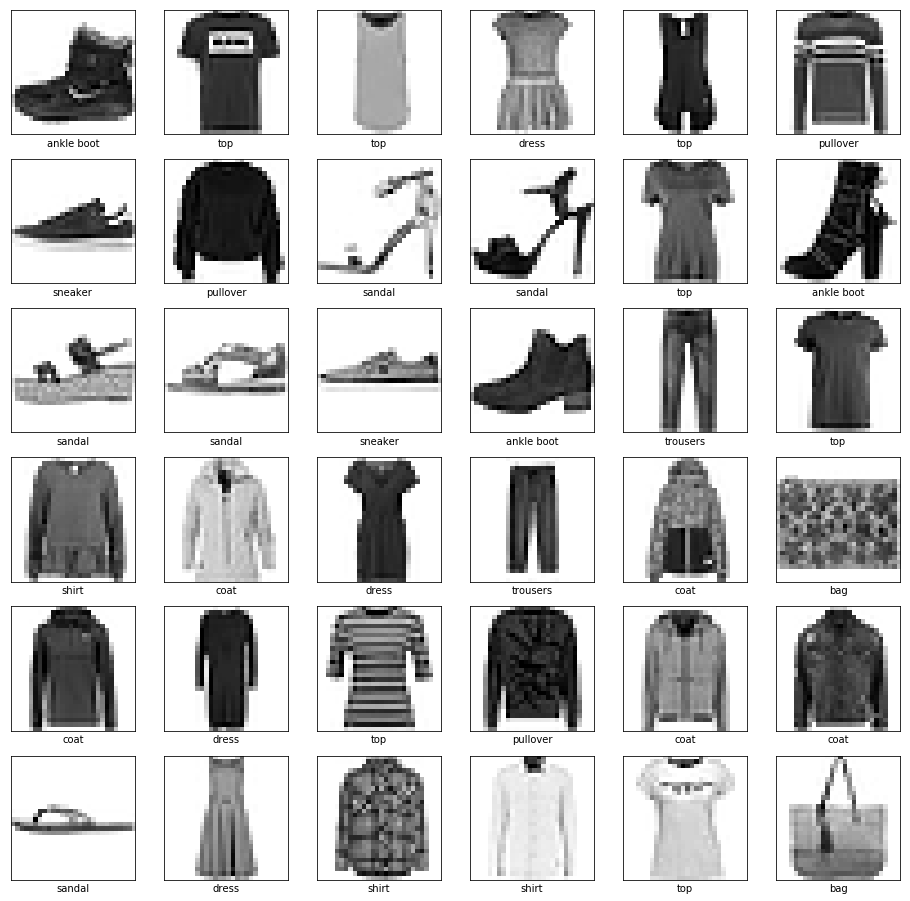

In [14]:
plt.figure(figsize=(16, 16))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_x[i], cmap=plt.cm.binary)
    plt.xlabel(labels[train_y[i]])

In [7]:
train_x = train_x / 255
val_x = val_x / 255
test_x = test_x / 255

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),    # try to add more
    keras.layers.Dense(10, activation='softmax')])
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = model.fit(
    train_x,
    train_y,
    validation_data=(val_x, val_y),
    epochs=32)

Train on 60000 samples, validate on 5000 samples
Epoch 1/32
60000/60000 [==============================] - 17s 277us/step - loss: 0.5368 - acc: 0.8092 - val_loss: 0.4259 - val_acc: 0.8466
Epoch 2/32
60000/60000 [==============================] - 21s 352us/step - loss: 0.4073 - acc: 0.8527 - val_loss: 0.3922 - val_acc: 0.8558
Epoch 3/32
60000/60000 [==============================] - 20s 341us/step - loss: 0.3738 - acc: 0.8629 - val_loss: 0.3741 - val_acc: 0.8646
Epoch 4/32
60000/60000 [==============================] - 21s 356us/step - loss: 0.3539 - acc: 0.8711 - val_loss: 0.3637 - val_acc: 0.8678
Epoch 5/32
60000/60000 [==============================] - 22s 360us/step - loss: 0.3381 - acc: 0.8756 - val_loss: 0.3570 - val_acc: 0.8708
Epoch 6/32
60000/60000 [==============================] - 22s 364us/step - loss: 0.3285 - acc: 0.8798 - val_loss: 0.3493 - val_acc: 0.8734
Epoch 7/32
60000/60000 [==============================] - 22s 363us/step - loss: 0.3183 - acc: 0.8817 - val_loss: 0.3

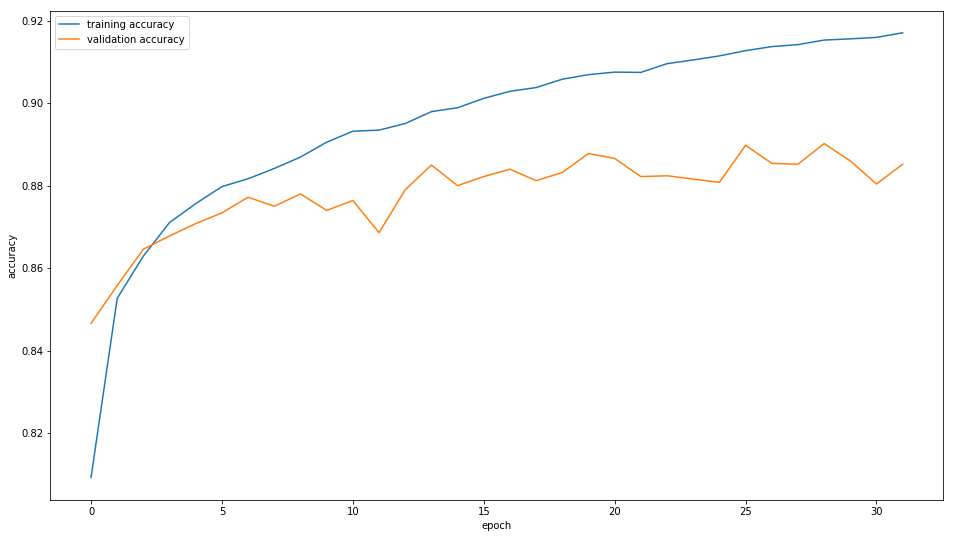

In [30]:
plt.figure(figsize=(16, 9))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(history.epoch, history.history['acc'], label='training accuracy')
plt.plot(history.epoch, history.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

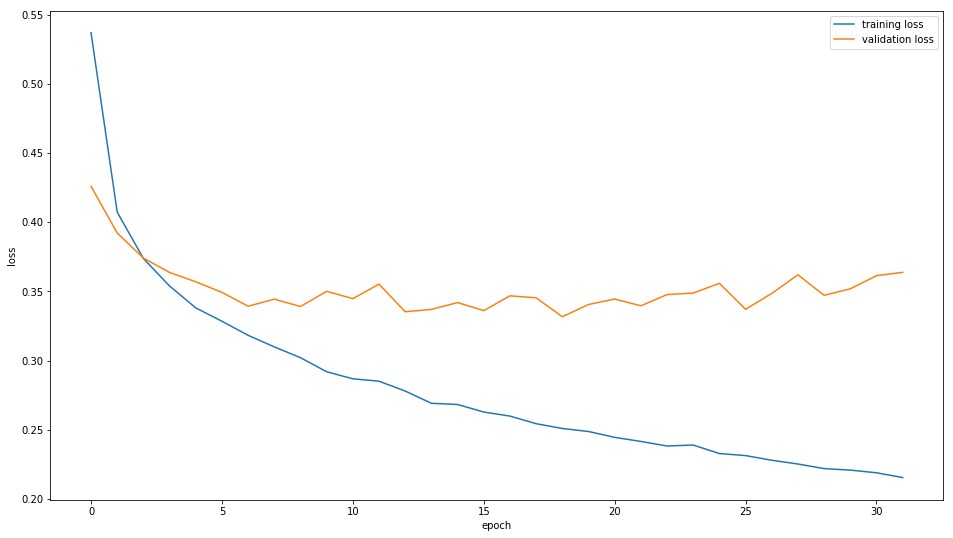

In [31]:
plt.figure(figsize=(16, 9))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(history.epoch, history.history['loss'], label='training loss')
plt.plot(history.epoch, history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

In [27]:
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(4, 4)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1290      
Total para

In [ ]:
train_images = train_images.reshape(60000, 28, 28, 1)

history = model.fit(train_images, train_labels, epochs=5)